# ***Demon notebook created by Prof. Monali Mavani***

# Feature Engineering Walkthrough (Wine Dataset)

This notebook demonstrates key feature engineering techniques.

1. Feature Construction
2. Feature Transformation
3. Irrelevant Feature Removal
4. Define features and target
5. Train-test split
6. Missing value Imputation
7. Feature scaling
8. Supervised Feature Selection using Pearson Correlation
9. Dimensionality reduction using PCA



In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset
wine = load_wine(as_frame=True)
print(f"Description: {wine.DESCR}")

Description: .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0 

In [ ]:
#create a dataframe using wine data
df = wine.frame
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
# 1. Feature Construction
df['ColorIntensity_Hue'] = df['color_intensity'] * df['hue']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
# 2. Feature Transformation
df['LOG_MalicAcid'] = np.log1p(df['malic_acid']) # calculates log(1+x)
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,ColorIntensity_Hue,LOG_MalicAcid
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,5.8656,0.996949
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,4.5990,1.022451
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,5.8504,1.211941
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,6.7080,1.081805
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,4.4928,1.278152


In [ ]:
# 3. Irrelevant Feature Removal
df = df.drop(columns=['nonflavanoid_phenols'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   proanthocyanins               178 non-null    float64
 8   color_intensity               178 non-null    float64
 9   hue                           178 non-null    float64
 10  od280/od315_of_diluted_wines  178 non-null    float64
 11  proline                       178 non-null    float64
 12  target                        178 non-null    int64  
 13  Color

In [ ]:
# 4. Define features and target
X = df.drop(columns='target')
y = df['target']
print(X.shape)
print(y.shape)


(178, 14)
(178,)


In [ ]:
# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Missing Value Imputation**

In [ ]:
# 6. Imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# **Feature Scaling**

In [ ]:
# 7. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
print(X_train_scaled)

[[ 1.66529275 -0.60840587  1.21896194 ... -0.24860607  1.78904812
  -0.57760139]
 [-0.54952506  2.7515415   1.00331502 ... -0.72992237 -0.26539174
   2.27998112]
 [-0.74531007 -1.14354109 -0.93750727 ... -0.24860607  0.09460074
  -1.40915497]
 ...
 [ 1.714239   -0.44172441  0.06884503 ...  2.69572196  2.77592406
  -0.35706529]
 [-0.35374006 -0.7399965  -0.36244882 ... -0.79631083 -0.99282482
  -0.7630497 ]
 [-0.78201975  0.06709269  0.35637426 ... -0.98551793 -1.41985039
   0.23556513]]


# **Feature selection**

In [ ]:
# 8. Supervised Feature Selection using Pearson Correlation with the Target
# Step 1: Compute absolute Pearson correlation between each feature and the target
# This uses np.corrcoef to get the correlation matrix and extracts the last row (target correlation)
correlations = np.abs(np.corrcoef(X_train_scaled.T, y_train)[-1, :-1])

# Step 2: Get indices of the top 8 features with the highest absolute correlation to the target
top_k_indices = np.argsort(correlations)[-8:]

# Step 3: Retrieve the names of the selected features and their corresponding correlation values
selected_feature_names = np.array(X.columns)[top_k_indices]
selected_feature_corrs = correlations[top_k_indices]

# Step 4: Create a DataFrame for easy display and interpretation
corr_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Correlation': selected_feature_corrs
})

# Step 5: Print the top correlated features and their correlation values
print("Top 8 features based on Pearson correlation with target:\n")
print(corr_df.sort_values(by="Correlation", ascending=False).reset_index(drop=True))


Top 8 features based on Pearson correlation with target:

                        Feature  Correlation
0                    flavanoids     0.842202
1  od280/od315_of_diluted_wines     0.797794
2                 total_phenols     0.690035
3                       proline     0.623131
4                           hue     0.610428
5             alcalinity_of_ash     0.519728
6               proanthocyanins     0.490675
7                    malic_acid     0.457122


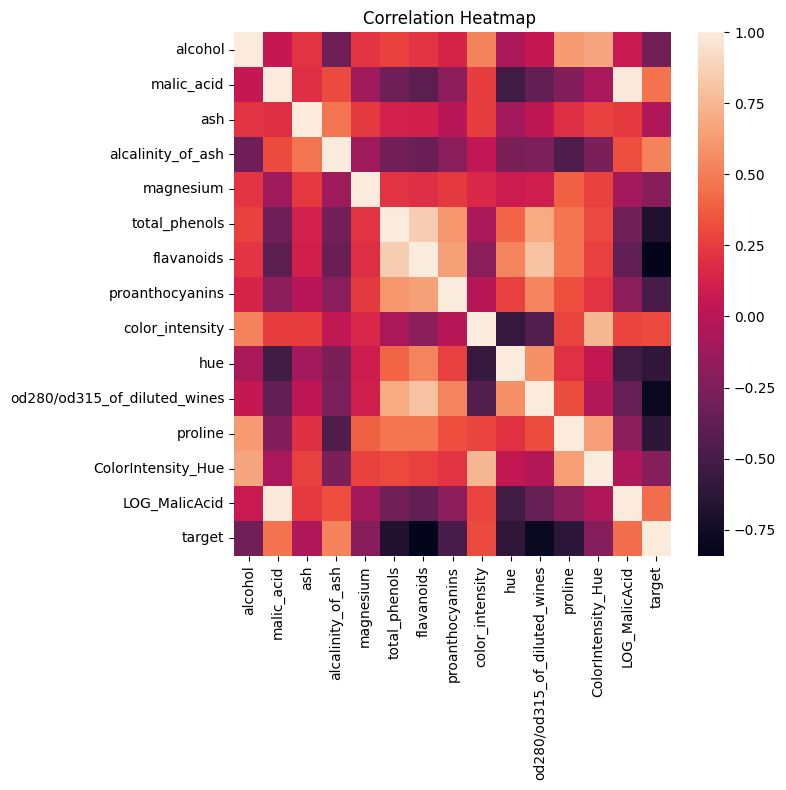

In [ ]:
# Correlation heatmap
df_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
df_scaled['target'] = y_train.reset_index(drop=True)
corr_matrix = df_scaled.corr()

# Plot
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix)
plt.title("Correlation Heatmap ")
plt.tight_layout()
plt.show()


# **PCA Features**
PCA transforms the original features into a new set of features called principal components, which are:

Linear combinations of the original features

Orthogonal (uncorrelated) to each other

Ranked by the amount of variance they capture

PC1 = a₁·feature₁ + a₂·feature₂ + ... + aₙ·featureₙ

PC2 = b₁·feature₁ + b₂·feature₂ + ... + bₙ·featureₙ



In [ ]:
# 9. Principal Component Analysis (PCA) — a linear dimensionality reduction technique.
# Select those features from the scaled data
X_train_selected = X_train_scaled[:, top_k_indices]
X_test_selected = X_test_scaled[:, top_k_indices]

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

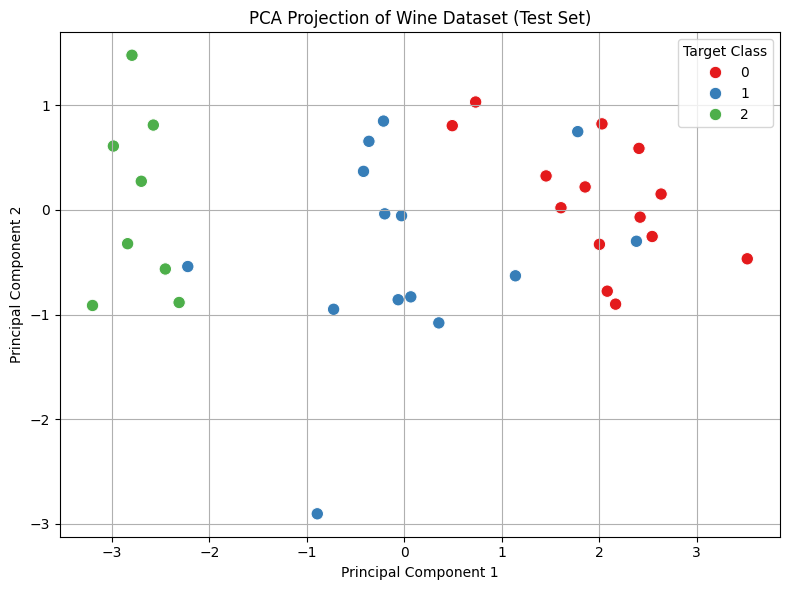

In [ ]:
# PCA Visualization
pca_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y_test.reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set1', s=80)
plt.title("PCA Projection of Wine Dataset (Test Set)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title="Target Class")
plt.tight_layout()
plt.show()


Principal Component 1 (PC1): The direction (vector) in feature space along which the most variance in the data is explained.

Principal Component 2 (PC2): The orthogonal direction to PC1 that explains the second most variance.


It Visualizes high-dimensional feature space compactly.

It assesses separability of classes (i.e., how well a classifier might perform). It  loses interpretability because components are mixed. so useful for exploratory data analysis before training

In [ ]:
components = pca.components_

# Create contributions table
pca_contributions = pd.DataFrame(components.T,
                                 index=selected_feature_names,
                                 columns=['PC1', 'PC2'])

# Sort contributions by absolute value
top_pc1 = pca_contributions['PC1'].abs().sort_values(ascending=False)
top_pc2 = pca_contributions['PC2'].abs().sort_values(ascending=False)

# Combine for table display
top_features_pca = pd.DataFrame({
    'Top Contributors to PC1': top_pc1.index,
    'PC1 Loading': top_pc1.values,
    'Top Contributors to PC2': top_pc2.index,
    'PC2 Loading': top_pc2.values
})

# Display contribution table
top_features_pca


,Top Contributors to PC1,PC1 Loading,Top Contributors to PC2,PC2 Loading
0,flavanoids,0.455850,malic_acid,0.567527
1,total_phenols,0.422350,alcalinity_of_ash,0.461688
2,od280/od315_of_diluted_wines,0.414876,proanthocyanins,0.435418
3,proanthocyanins,0.339729,hue,0.358759
4,hue,0.326202,total_phenols,0.278296
5,proline,0.288751,flavanoids,0.192181
6,malic_acid,0.275349,od280/od315_of_diluted_wines,0.149984
7,alcalinity_of_ash,0.246336,proline,0.097893


Loadings reflect how much each original feature contributes to a principal component.

A high absolute value means the feature has a strong influence on that component.

These are derived from the eigenvectors of the feature covariance matrix.